In [8]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Chargement du modèle final
best_model = joblib.load("models/credit_scoring_model.pkl")



In [15]:
import pandas as pd

# Charger les données préparées
data_fe = pd.read_csv("../data/data_fe.csv")

# Séparer variables explicatives et cible
X = data_fe.drop("TARGET", axis=1)
y = data_fe["TARGET"]
y.value_counts(normalize=True) * 100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

# Assure-toi que cette ligne est exécutée
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Importance globale des variables**

In [ ]:
from sklearn.inspection import permutation_importance

# 1.  Avoir le modèle final
model_final = best_model[-1]

# 2. calcule de l'importance par permutation
# On utilise X_test_scaled et y_test pour voir comment les variables impactent les prédictions réelles
result = permutation_importance(
    best_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

# 3. Création du DataFrame
feature_importance = pd.DataFrame({
    "feature": X_train.columns,
    "importance": result.importances_mean # On prend la moyenne des 10 répétitions
}).sort_values(by="importance", ascending=False)

# 4. Affichage
print(feature_importance.head(10))

                         feature  importance
29                  EXT_SOURCE_2    0.000893
30                  EXT_SOURCE_3    0.000842
28                  EXT_SOURCE_1    0.000524
5                AMT_GOODS_PRICE    0.000408
4                    AMT_ANNUITY    0.000239
3                     AMT_CREDIT    0.000236
7                     DAYS_BIRTH    0.000213
127   NAME_FAMILY_STATUS_Married    0.000187
78        DAYS_LAST_PHONE_CHANGE    0.000150
20   REGION_RATING_CLIENT_W_CITY    0.000145


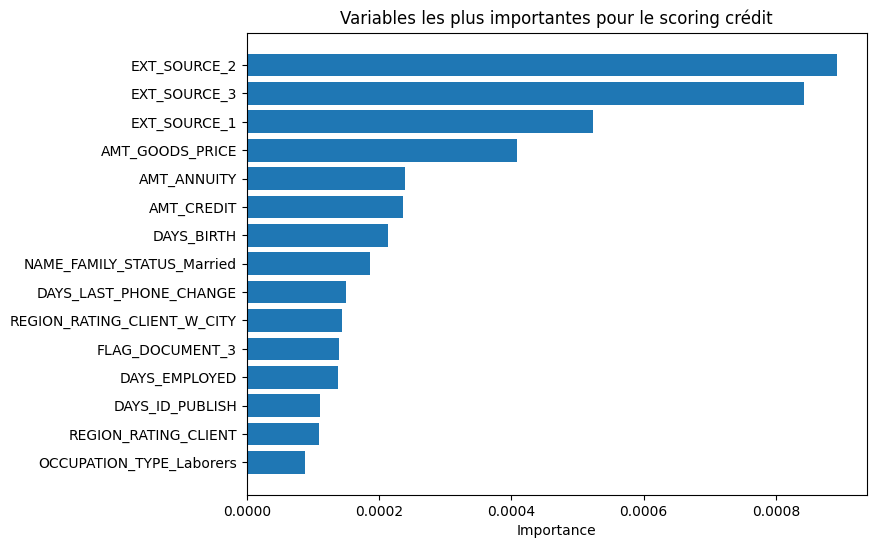

In [25]:
# Top 15 variables les plus influentes
top_features = feature_importance.head(15)

plt.figure(figsize=(8,6))
plt.barh(top_features["feature"], top_features["importance"])
plt.gca().invert_yaxis()
plt.title("Variables les plus importantes pour le scoring crédit")
plt.xlabel("Importance")
plt.show()


## Interprétation métier

Les variables les plus importantes correspondent principalement à :
- l'historique de crédit du client
- le montant des crédits précédents
- les retards de paiement
- la situation financière globale

Ces résultats sont cohérents avec la logique métier du crédit :
les comportements passés de remboursement sont fortement prédictifs du risque.


**Explication pour un chargé de clientèle**

Le modèle ne décide pas au hasard.
Il analyse l’historique de crédit, les montants empruntés et les retards passés pour estimer le risque de défaut.

In [26]:
# Analyse d’un client spécifique
# Exemple : un client du test set
client_index = 0

client_data = X_test.iloc[[client_index]]

# Probabilité de défaut
proba = best_model.predict_proba(client_data)[0,1]

print("Probabilité de défaut :", proba)


Probabilité de défaut : 0.17590867264331483


proche de 0 → client fiable

## Conclusion – Interprétabilité globale

L’analyse des importances de variables montre que le modèle repose
principalement sur des informations financières cohérentes avec la logique métier.

Cette première étape permet d'expliquer le modèle globalement.
L’étape suivante consistera à expliquer les décisions individuellement
à l’aide de la méthode SHAP.
